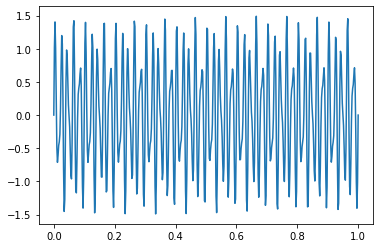

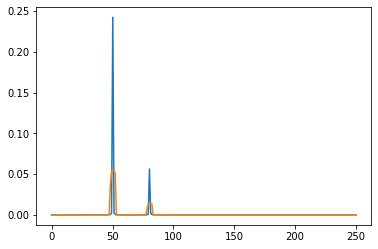

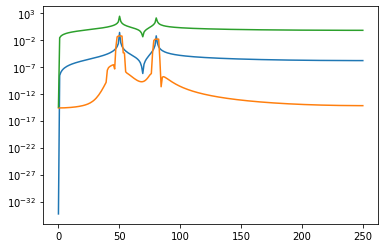

9.476689859725133e-15 1.0076346745924517e-14 1.1518571768647736e-14 2.440754380393462e-13 0.3137073594475763 4.769214727523407e-15 9.55981780970536e-15 1.4393532481399172e-14
0.3118742772386622 0.31370735957164997


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from numba import njit
# from scipy import fft
from spectrum import dpss, pmtm

def find_nearest_index(array, item):
    """Find the index with the closest value compared to the item."""
    return (np.abs(array - item)).argmin()

find_nearest_index == njit()(find_nearest_index)

N = 500
dt = 2 * 10 ** -3
# Creating a signal with 2 sinus waves (50 Hz, 1 and 80 Hz, 0.5)
x = np.linspace(0.0, N * dt, N)
y = np.sin(50.0 * 2.0 * np.pi * x) + 0.5 * np.sin(80.0 * 2.0 * np.pi * x)

# Plotting signal
plt.figure()
plt.plot(x, y)
plt.show(block=False)

# Classical FFT
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0 / (2.0 * dt), N // 2)

# The multitapered method
NW = 2.5
k = 4
[tapers, eigen] = dpss(N, NW, k)
Sk_complex, weights, _ = pmtm(
    y,
    e=eigen,
    v=tapers,
    NFFT=N,
    show=False,
)

Sk = abs(Sk_complex) ** 2
Sk = np.mean(Sk * np.transpose(weights), axis=0) * dt

# Ploting both results
plt.figure()
plt.plot(xf, abs(yf[0:N // 2]) ** 2 / N * dt)
plt.plot(xf, Sk[0:N // 2])
# plt.plot(xf, abs(yf[0:N // 2]))
plt.show(block=False)

# Ploting both results in log scale
plt.figure()
plt.semilogy(xf, abs(yf[0:N // 2]) ** 2 / N * dt)
plt.semilogy(xf, Sk[0:N // 2])
# plt.semilogy(xf, abs(yf[0:N // 2]))
# plt.ylim(1e-15, 1)
plt.show()

# Power bands
# Delta (0.5–4 Hz)
multitaper_delta_05hz_4hz_power = np.sum(
    Sk[find_nearest_index(xf, 0.5):find_nearest_index(xf, 4)],
    axis=-1,
)

# Theta (4–8 Hz)
multitaper_theta_4hz_8hz_power = np.sum(
    Sk[find_nearest_index(xf, 4):find_nearest_index(xf, 8)],
    axis=-1,
)

# Alpha (8–12 Hz)
multitaper_alpha_8hz_12hz_power = np.sum(
    Sk[find_nearest_index(xf, 8):find_nearest_index(xf, 12)],
    axis=-1,
)

# Beta (12–30 Hz)
multitaper_beta_12hz_30hz_power = np.sum(
    Sk[find_nearest_index(xf, 12):find_nearest_index(xf, 30)],
    axis=-1,
)

# Gamma (30–100 Hz)
multitaper_gamma_30hz_100hz_power = np.sum(
    Sk[find_nearest_index(xf, 30):find_nearest_index(xf, 100)],
    axis=-1,
)

# 2Hz4hz
multitaper_epilepsy_2hz_4hz_power = np.sum(
    Sk[find_nearest_index(xf, 2):find_nearest_index(xf, 4)],
    axis=-1,
)

# 1Hz5hz
multitaper_epilepsy_1hz_5hz_power = np.sum(
    Sk[find_nearest_index(xf, 1):find_nearest_index(xf, 5)],
    axis=-1,
)

# 0Hz6hz
multitaper_epilepsy_0hz_6hz_power = np.sum(
    Sk[find_nearest_index(xf, 0):find_nearest_index(xf, 6)],
    axis=-1,
)

print(
    delta_05hz_4hz_power,
    theta_4hz_8hz_power,
    alpha_8hz_12hz_power,
    beta_12hz_30hz_power,
    gamma_30hz_100hz_power,
    epilepsy_2hz_4hz_power,
    epilepsy_1hz_5hz_power,
    epilepsy_0hz_6hz_power,
)

# Comparing total power
print(np.sum(abs(yf[0:N // 2]) ** 2 / N * dt), np.sum(Sk[0:N // 2]))

In [6]:
np.random.seed(42)
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [27]:
def find_nearest_index(array, item):
    """Find the index with the closest value compared to the item."""
    return (np.abs(array - item)).argmin()

i = find_nearest_index(xf, )
xf[i]

50.20080321285141

In [16]:
# (np.exp(1j * np.pi) - np.exp(-1j * np.pi)) / 2j
# np.sin(1)

(1.2246467991473532e-16+0j)